In [1]:
import numpy as np  
import pandas as pd 
import math

#Demonstrates Display of dataframe in a better way 
from IPython.display import display, HTML

# Tells matplotlib to display images inline instead of a new window
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
localPath = "../../crimesInChicagoData/Unsupervised-MachineLearning/finalProject/year"
fileType = "_10clusterCentroids.csv"

In [10]:
allCentroids  = pd.read_csv(localPath+str(2001)+fileType)
for year in range(2002, 2017, 1):
    datasetFilePath = localPath+str(year)+fileType
    centroidDf = pd.read_csv(datasetFilePath)
    allCentroids = allCentroids.append(centroidDf)

In [11]:
allCentroids

,Unnamed: 0,index,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
0,0,6,810,THEFT,OVER $500,STREET,False,False,5.0,2001.0,6,29,22
1,1,32,460,BATTERY,SIMPLE,RESIDENCE,False,True,25.0,2001.0,7,21,21
2,2,1078,560,ASSAULT,SIMPLE,RESIDENCE,False,False,7.0,2001.0,2,6,17
3,3,132,460,BATTERY,SIMPLE,RESIDENCE,False,False,18.0,2001.0,12,4,9
4,4,17,2027,NARCOTICS,POSS: CRACK,STREET,True,False,2.0,2001.0,2,26,19
5,5,20,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,7.0,2001.0,4,18,20
6,6,382,560,ASSAULT,SIMPLE,STREET,False,False,14.0,2001.0,11,20,16
7,7,1193,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,3.0,2001.0,5,6,0
8,8,335,820,THEFT,$500 AND UNDER,STREET,False,False,8.0,2001.0,1,19,15
9,9,118,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,10.0,2001.0,10,1,21


In [12]:
allCentroids = allCentroids.reset_index()

In [14]:
allCentroids = allCentroids.drop(['level_0', 'Unnamed: 0', 'index'], axis = 1)

In [17]:
allCentroids.head(20)

,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
0,810,THEFT,OVER $500,STREET,False,False,5.0,2001.0,6,29,22
1,460,BATTERY,SIMPLE,RESIDENCE,False,True,25.0,2001.0,7,21,21
2,560,ASSAULT,SIMPLE,RESIDENCE,False,False,7.0,2001.0,2,6,17
3,460,BATTERY,SIMPLE,RESIDENCE,False,False,18.0,2001.0,12,4,9
4,2027,NARCOTICS,POSS: CRACK,STREET,True,False,2.0,2001.0,2,26,19
5,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,7.0,2001.0,4,18,20
6,560,ASSAULT,SIMPLE,STREET,False,False,14.0,2001.0,11,20,16
7,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,3.0,2001.0,5,6,0
8,820,THEFT,$500 AND UNDER,STREET,False,False,8.0,2001.0,1,19,15
9,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,10.0,2001.0,10,1,21


In [23]:
uniqueLocations = allCentroids['Location Description'].unique()
uniqueLocations

array(['STREET', 'RESIDENCE', 'SIDEWALK', 'APARTMENT',
       'GROCERY FOOD STORE', 'OTHER', 'PARKING LOT/GARAGE(NON.RESID.)',
       'DEPARTMENT STORE'], dtype=object)

These are the places that crime happens most often 

In [26]:
uniqueMonth = sorted(allCentroids['Month'].unique())
uniqueMonth

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [27]:
uniqueDay = sorted(allCentroids['Day'].unique())
uniqueDay

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [29]:
uniqueHour = sorted(allCentroids['Hour'].unique())
uniqueHour

[0, 1, 2, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

Crimes do not seem to occur most frequently from 3AM - 7AM 

In [79]:
uniqueDistricts = sorted(allCentroids['District'].unique())
uniqueDistricts

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 22.0,
 24.0,
 25.0]

In [22]:
uniqueCrimes = allCentroids['Description'].unique()
uniqueCrimes

array(['OVER $500', 'SIMPLE', 'POSS: CRACK',
       'POSS: CANNABIS 30GMS OR LESS', 'TO VEHICLE', '$500 AND UNDER',
       'TO PROPERTY', 'DOMESTIC BATTERY SIMPLE', 'FORCIBLE ENTRY',
       'HARASSMENT BY TELEPHONE', 'FROM BUILDING', 'AUTOMOBILE',
       'FINANCIAL ID THEFT: OVER $300', 'RETAIL THEFT', 'TELEPHONE THREAT',
       'CREDIT CARD FRAUD', 'ARMED: HANDGUN', 'UNLAWFUL POSS OF HANDGUN'], dtype=object)

In [19]:
crimeMap = {}

In [33]:
for crime in uniqueCrimes: 
    crimeMap[crime] = allCentroids.loc[allCentroids['Description'] == crime]

In [40]:
for crimeGroup in crimeMap: 
    print(crimeGroup)
    display(crimeMap[crimeGroup])
    print("--------------------------\n")

OVER $500


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
0,810,THEFT,OVER $500,STREET,False,False,5.0,2001.0,6,29,22
28,810,THEFT,OVER $500,STREET,False,False,12.0,2003.0,10,29,14
32,810,THEFT,OVER $500,STREET,False,False,6.0,2004.0,8,12,12
57,810,THEFT,OVER $500,STREET,False,False,17.0,2006.0,7,17,1
77,810,THEFT,OVER $500,STREET,False,False,24.0,2008.0,10,29,18
90,810,THEFT,OVER $500,SIDEWALK,False,False,19.0,2010.0,9,24,18
98,810,THEFT,OVER $500,STREET,False,False,8.0,2010.0,7,12,9
103,810,THEFT,OVER $500,STREET,False,False,1.0,2011.0,1,4,13
105,810,THEFT,OVER $500,STREET,False,False,1.0,2011.0,5,19,23
120,810,THEFT,OVER $500,STREET,False,False,2.0,2013.0,2,15,16


--------------------------

SIMPLE


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
1,460,BATTERY,SIMPLE,RESIDENCE,False,True,25.0,2001.0,7,21,21
2,560,ASSAULT,SIMPLE,RESIDENCE,False,False,7.0,2001.0,2,6,17
3,460,BATTERY,SIMPLE,RESIDENCE,False,False,18.0,2001.0,12,4,9
6,560,ASSAULT,SIMPLE,STREET,False,False,14.0,2001.0,11,20,16
11,460,BATTERY,SIMPLE,SIDEWALK,False,False,15.0,2002.0,8,3,10
19,460,BATTERY,SIMPLE,STREET,True,False,17.0,2002.0,5,15,9
26,460,BATTERY,SIMPLE,SIDEWALK,False,False,7.0,2003.0,11,7,14
29,460,BATTERY,SIMPLE,STREET,False,False,9.0,2003.0,5,17,18
36,460,BATTERY,SIMPLE,STREET,True,False,6.0,2004.0,12,18,22
41,460,BATTERY,SIMPLE,SIDEWALK,False,False,5.0,2005.0,9,15,10


--------------------------

POSS: CRACK


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
4,2027,NARCOTICS,POSS: CRACK,STREET,True,False,2.0,2001.0,2,26,19
49,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,11.0,2005.0,11,1,21


--------------------------

POSS: CANNABIS 30GMS OR LESS


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
5,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,7.0,2001.0,4,18,20
13,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,11.0,2002.0,5,30,18
22,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,11.0,2003.0,11,5,20
34,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,11.0,2004.0,7,8,19
42,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,15.0,2005.0,4,28,14
55,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,11.0,2006.0,10,20,21
61,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,11.0,2007.0,1,2,19
69,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,7.0,2007.0,6,28,13
76,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,11.0,2008.0,12,22,21
82,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,11.0,2009.0,6,17,19


--------------------------

TO VEHICLE


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
7,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,3.0,2001.0,5,6,0
10,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,8.0,2002.0,7,13,16
33,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,5.0,2004.0,1,6,22
45,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,10.0,2005.0,6,1,12
52,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,8.0,2006.0,11,6,0
59,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,18.0,2006.0,2,16,8
67,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,8.0,2007.0,12,23,0
71,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,6.0,2008.0,6,1,20
80,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,5.0,2009.0,2,25,8
96,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,9.0,2010.0,5,16,10


--------------------------

$500 AND UNDER


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
8,820,THEFT,$500 AND UNDER,STREET,False,False,8.0,2001.0,1,19,15
14,820,THEFT,$500 AND UNDER,STREET,False,False,2.0,2002.0,8,14,20
21,820,THEFT,$500 AND UNDER,STREET,False,False,1.0,2003.0,10,19,9
35,820,THEFT,$500 AND UNDER,STREET,False,False,12.0,2004.0,6,14,22
37,820,THEFT,$500 AND UNDER,SIDEWALK,False,False,19.0,2004.0,11,19,22
40,820,THEFT,$500 AND UNDER,STREET,False,False,9.0,2005.0,11,23,0
66,820,THEFT,$500 AND UNDER,STREET,False,False,6.0,2007.0,5,6,16
74,820,THEFT,$500 AND UNDER,STREET,False,False,19.0,2008.0,5,27,22
83,820,THEFT,$500 AND UNDER,STREET,False,False,19.0,2009.0,9,13,0
91,820,THEFT,$500 AND UNDER,STREET,False,False,5.0,2010.0,11,2,16


--------------------------

TO PROPERTY


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
9,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,10.0,2001.0,10,1,21
15,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,14.0,2002.0,2,2,0
20,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,16.0,2003.0,1,16,23
39,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,8.0,2004.0,9,11,20
47,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,4.0,2005.0,4,27,20
50,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,25.0,2006.0,7,10,18
58,1310,CRIMINAL DAMAGE,TO PROPERTY,SIDEWALK,False,False,8.0,2006.0,6,14,15
65,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,3.0,2007.0,6,12,19
79,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,7.0,2008.0,9,23,22
88,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,8.0,2009.0,7,5,0


--------------------------

DOMESTIC BATTERY SIMPLE


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
12,486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,8.0,2002.0,5,8,14
18,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,2.0,2002.0,3,24,18
23,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,7.0,2003.0,7,20,18
31,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,False,25.0,2004.0,6,10,16
43,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,7.0,2005.0,7,7,21
54,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,7.0,2006.0,4,1,0
63,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,25.0,2007.0,2,17,18
72,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,7.0,2008.0,10,12,21
86,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,7.0,2009.0,1,23,20
95,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,8.0,2010.0,10,18,22


--------------------------

FORCIBLE ENTRY


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
16,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,3.0,2002.0,8,7,17
38,610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,3.0,2004.0,9,18,15
51,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,12.0,2006.0,7,30,22
84,610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,15.0,2009.0,6,3,15
94,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,22.0,2010.0,8,16,9
104,610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,7.0,2011.0,10,23,9
111,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,4.0,2012.0,2,3,9
128,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,4.0,2013.0,4,22,11
139,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,9.0,2014.0,7,8,20


--------------------------

HARASSMENT BY TELEPHONE


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
17,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,18.0,2002.0,6,18,12


--------------------------

FROM BUILDING


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
24,890,THEFT,FROM BUILDING,RESIDENCE,False,False,12.0,2003.0,8,18,12
46,890,THEFT,FROM BUILDING,OTHER,False,False,1.0,2005.0,9,20,0
56,890,THEFT,FROM BUILDING,RESIDENCE,False,False,5.0,2006.0,12,12,15


--------------------------

AUTOMOBILE


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
25,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,6.0,2003.0,11,15,21
30,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,15.0,2004.0,5,19,21
113,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,10.0,2012.0,10,13,22
158,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,10.0,2016.0,11,13,12


--------------------------

FINANCIAL ID THEFT: OVER $300


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
27,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,8.0,2003.0,9,2,0


--------------------------

RETAIL THEFT


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
44,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,12.0,2005.0,9,3,13
75,860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,12.0,2008.0,2,12,22
89,860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,1.0,2009.0,9,26,16
106,860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,9.0,2011.0,9,29,16
145,860,THEFT,RETAIL THEFT,SIDEWALK,True,False,11.0,2015.0,8,2,19
159,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,1.0,2016.0,5,26,16


--------------------------

TELEPHONE THREAT


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
60,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,16.0,2007.0,4,9,20
122,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,False,18.0,2013.0,12,18,9


--------------------------

CREDIT CARD FRAUD


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
126,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER,False,False,12.0,2013.0,1,9,12


--------------------------

ARMED: HANDGUN


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
133,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,1.0,2014.0,11,30,2


--------------------------

UNLAWFUL POSS OF HANDGUN


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
152,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,5.0,2016.0,9,4,21


--------------------------



In [51]:
districtMap ={}

In [52]:
for district in uniqueDistricts: 
    districtMap[district] = allCentroids.loc[allCentroids['District'] == district]

In [55]:
for districtGroup in districtMap: 
    print("District "+str(districtGroup)+ ": ")
    display(districtMap[districtGroup])
    print("--------------------------\n")

District 5.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
0,810,THEFT,OVER $500,STREET,False,False,5.0,2001.0,6,29,22
33,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,5.0,2004.0,1,6,22
41,460,BATTERY,SIMPLE,SIDEWALK,False,False,5.0,2005.0,9,15,10
56,890,THEFT,FROM BUILDING,RESIDENCE,False,False,5.0,2006.0,12,12,15
80,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,5.0,2009.0,2,25,8
91,820,THEFT,$500 AND UNDER,STREET,False,False,5.0,2010.0,11,2,16
127,820,THEFT,$500 AND UNDER,STREET,False,False,5.0,2013.0,8,16,15
149,820,THEFT,$500 AND UNDER,STREET,False,False,5.0,2015.0,8,14,10
152,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,5.0,2016.0,9,4,21


--------------------------

District 25.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
1,460,BATTERY,SIMPLE,RESIDENCE,False,True,25.0,2001.0,7,21,21
31,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,False,25.0,2004.0,6,10,16
50,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,25.0,2006.0,7,10,18
62,460,BATTERY,SIMPLE,STREET,True,False,25.0,2007.0,4,17,19
63,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,25.0,2007.0,2,17,18


--------------------------

District 7.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
2,560,ASSAULT,SIMPLE,RESIDENCE,False,False,7.0,2001.0,2,6,17
5,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,7.0,2001.0,4,18,20
23,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,7.0,2003.0,7,20,18
26,460,BATTERY,SIMPLE,SIDEWALK,False,False,7.0,2003.0,11,7,14
43,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,7.0,2005.0,7,7,21
53,460,BATTERY,SIMPLE,STREET,False,False,7.0,2006.0,6,22,17
54,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,7.0,2006.0,4,1,0
69,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,7.0,2007.0,6,28,13
72,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,7.0,2008.0,10,12,21
79,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,7.0,2008.0,9,23,22


--------------------------

District 18.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
3,460,BATTERY,SIMPLE,RESIDENCE,False,False,18.0,2001.0,12,4,9
17,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,18.0,2002.0,6,18,12
59,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,18.0,2006.0,2,16,8
118,820,THEFT,$500 AND UNDER,STREET,False,False,18.0,2012.0,11,1,12
122,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,False,18.0,2013.0,12,18,9
134,0820,THEFT,$500 AND UNDER,STREET,False,False,18.0,2014.0,1,15,11
157,0810,THEFT,OVER $500,STREET,False,False,18.0,2016.0,8,10,1


--------------------------

District 2.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
4,2027,NARCOTICS,POSS: CRACK,STREET,True,False,2.0,2001.0,2,26,19
14,820,THEFT,$500 AND UNDER,STREET,False,False,2.0,2002.0,8,14,20
18,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,2.0,2002.0,3,24,18
120,810,THEFT,OVER $500,STREET,False,False,2.0,2013.0,2,15,16


--------------------------

District 14.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
6,560,ASSAULT,SIMPLE,STREET,False,False,14.0,2001.0,11,20,16
15,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,14.0,2002.0,2,2,0
92,460,BATTERY,SIMPLE,STREET,False,False,14.0,2010.0,6,1,17


--------------------------

District 3.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
7,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,3.0,2001.0,5,6,0
16,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,3.0,2002.0,8,7,17
38,610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,3.0,2004.0,9,18,15
65,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,3.0,2007.0,6,12,19
81,460,BATTERY,SIMPLE,RESIDENCE,False,False,3.0,2009.0,5,22,13
141,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,3.0,2015.0,8,17,13


--------------------------

District 8.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
8,820,THEFT,$500 AND UNDER,STREET,False,False,8.0,2001.0,1,19,15
10,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,8.0,2002.0,7,13,16
12,486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,8.0,2002.0,5,8,14
27,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,8.0,2003.0,9,2,0
39,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,8.0,2004.0,9,11,20
52,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,8.0,2006.0,11,6,0
58,1310,CRIMINAL DAMAGE,TO PROPERTY,SIDEWALK,False,False,8.0,2006.0,6,14,15
67,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,8.0,2007.0,12,23,0
70,560,ASSAULT,SIMPLE,RESIDENCE,False,False,8.0,2008.0,9,4,15
88,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,8.0,2009.0,7,5,0


--------------------------

District 10.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
9,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,10.0,2001.0,10,1,21
45,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,10.0,2005.0,6,1,12
48,460,BATTERY,SIMPLE,SIDEWALK,True,False,10.0,2005.0,8,19,20
113,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,10.0,2012.0,10,13,22
158,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,10.0,2016.0,11,13,12


--------------------------

District 15.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
11,460,BATTERY,SIMPLE,SIDEWALK,False,False,15.0,2002.0,8,3,10
30,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,15.0,2004.0,5,19,21
42,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,15.0,2005.0,4,28,14
64,560,ASSAULT,SIMPLE,STREET,False,False,15.0,2007.0,1,20,23
84,610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,15.0,2009.0,6,3,15


--------------------------

District 11.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
13,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,11.0,2002.0,5,30,18
22,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,11.0,2003.0,11,5,20
34,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,11.0,2004.0,7,8,19
49,2027,NARCOTICS,POSS: CRACK,SIDEWALK,True,False,11.0,2005.0,11,1,21
55,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,11.0,2006.0,10,20,21
61,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,11.0,2007.0,1,2,19
76,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,11.0,2008.0,12,22,21
82,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,11.0,2009.0,6,17,19
85,460,BATTERY,SIMPLE,STREET,False,False,11.0,2009.0,10,9,16
97,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,SIDEWALK,True,False,11.0,2010.0,4,7,19


--------------------------

District 17.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
19,460,BATTERY,SIMPLE,STREET,True,False,17.0,2002.0,5,15,9
57,810,THEFT,OVER $500,STREET,False,False,17.0,2006.0,7,17,1
78,460,BATTERY,SIMPLE,SIDEWALK,False,False,17.0,2008.0,1,29,17
129,460,BATTERY,SIMPLE,STREET,False,False,17.0,2013.0,7,12,15


--------------------------

District 16.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
20,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,16.0,2003.0,1,16,23
60,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,16.0,2007.0,4,9,20
112,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,16.0,2012.0,5,14,14


--------------------------

District 1.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
21,820,THEFT,$500 AND UNDER,STREET,False,False,1.0,2003.0,10,19,9
46,890,THEFT,FROM BUILDING,OTHER,False,False,1.0,2005.0,9,20,0
89,860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,1.0,2009.0,9,26,16
103,810,THEFT,OVER $500,STREET,False,False,1.0,2011.0,1,4,13
105,810,THEFT,OVER $500,STREET,False,False,1.0,2011.0,5,19,23
133,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,1.0,2014.0,11,30,2
159,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,1.0,2016.0,5,26,16


--------------------------

District 12.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
24,890,THEFT,FROM BUILDING,RESIDENCE,False,False,12.0,2003.0,8,18,12
28,810,THEFT,OVER $500,STREET,False,False,12.0,2003.0,10,29,14
35,820,THEFT,$500 AND UNDER,STREET,False,False,12.0,2004.0,6,14,22
44,860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,12.0,2005.0,9,3,13
51,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,12.0,2006.0,7,30,22
68,460,BATTERY,SIMPLE,STREET,False,False,12.0,2007.0,2,28,15
75,860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,12.0,2008.0,2,12,22
99,820,THEFT,$500 AND UNDER,STREET,False,False,12.0,2010.0,6,7,22
121,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,12.0,2013.0,11,23,22
126,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,OTHER,False,False,12.0,2013.0,1,9,12


--------------------------

District 6.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
25,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,6.0,2003.0,11,15,21
32,810,THEFT,OVER $500,STREET,False,False,6.0,2004.0,8,12,12
36,460,BATTERY,SIMPLE,STREET,True,False,6.0,2004.0,12,18,22
66,820,THEFT,$500 AND UNDER,STREET,False,False,6.0,2007.0,5,6,16
71,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,6.0,2008.0,6,1,20
117,560,ASSAULT,SIMPLE,SIDEWALK,False,False,6.0,2012.0,6,24,18
131,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,6.0,2014.0,12,29,18
138,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,6.0,2014.0,3,2,22
148,560,ASSAULT,SIMPLE,SIDEWALK,False,False,6.0,2015.0,7,10,10


--------------------------

District 9.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
29,460,BATTERY,SIMPLE,STREET,False,False,9.0,2003.0,5,17,18
40,820,THEFT,$500 AND UNDER,STREET,False,False,9.0,2005.0,11,23,0
93,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,9.0,2010.0,4,8,11
96,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,9.0,2010.0,5,16,10
106,860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,9.0,2011.0,9,29,16
139,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,False,False,9.0,2014.0,7,8,20


--------------------------

District 19.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
37,820,THEFT,$500 AND UNDER,SIDEWALK,False,False,19.0,2004.0,11,19,22
74,820,THEFT,$500 AND UNDER,STREET,False,False,19.0,2008.0,5,27,22
83,820,THEFT,$500 AND UNDER,STREET,False,False,19.0,2009.0,9,13,0
90,810,THEFT,OVER $500,SIDEWALK,False,False,19.0,2010.0,9,24,18
100,460,BATTERY,SIMPLE,STREET,False,False,19.0,2011.0,3,2,22
140,810,THEFT,OVER $500,STREET,False,False,19.0,2015.0,6,29,18
154,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,19.0,2016.0,5,4,15


--------------------------

District 4.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
47,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,4.0,2005.0,4,27,20
87,560,ASSAULT,SIMPLE,RESIDENCE,True,False,4.0,2009.0,5,24,10
108,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,4.0,2011.0,12,6,21
111,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,4.0,2012.0,2,3,9
128,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,4.0,2013.0,4,22,11
132,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,2014.0,4,21,19
144,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,4.0,2015.0,5,15,22
146,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,4.0,2015.0,5,18,19
150,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,4.0,2016.0,5,2,23


--------------------------

District 22.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
73,460,BATTERY,SIMPLE,STREET,False,False,22.0,2008.0,6,11,14
94,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,22.0,2010.0,8,16,9
109,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,22.0,2011.0,4,15,19
143,560,ASSAULT,SIMPLE,RESIDENCE,False,False,22.0,2015.0,10,25,15


--------------------------

District 24.0: 


,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
77,810,THEFT,OVER $500,STREET,False,False,24.0,2008.0,10,29,18


--------------------------



In [65]:
import seaborn as sns;

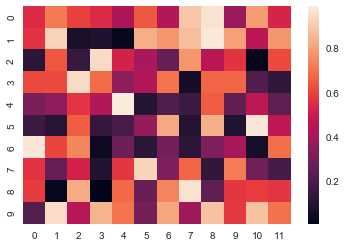

In [66]:
sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

In [71]:
uniform_data

array([[ 0.5488135 ,  0.71518937,  0.60276338,  0.54488318,  0.4236548 ,
         0.64589411,  0.43758721,  0.891773  ,  0.96366276,  0.38344152,
         0.79172504,  0.52889492],
       [ 0.56804456,  0.92559664,  0.07103606,  0.0871293 ,  0.0202184 ,
         0.83261985,  0.77815675,  0.87001215,  0.97861834,  0.79915856,
         0.46147936,  0.78052918],
       [ 0.11827443,  0.63992102,  0.14335329,  0.94466892,  0.52184832,
         0.41466194,  0.26455561,  0.77423369,  0.45615033,  0.56843395,
         0.0187898 ,  0.6176355 ],
       [ 0.61209572,  0.616934  ,  0.94374808,  0.6818203 ,  0.3595079 ,
         0.43703195,  0.6976312 ,  0.06022547,  0.66676672,  0.67063787,
         0.21038256,  0.1289263 ],
       [ 0.31542835,  0.36371077,  0.57019677,  0.43860151,  0.98837384,
         0.10204481,  0.20887676,  0.16130952,  0.65310833,  0.2532916 ,
         0.46631077,  0.24442559],
       [ 0.15896958,  0.11037514,  0.65632959,  0.13818295,  0.19658236,
         0.36872517,  

In [73]:
df_2001  = pd.read_csv(localPath+str(2001)+"_10clusters.csv")

In [121]:
df_2001.head()

,Unnamed: 0,index,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour,index.1,clusters_10
0,0,6,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,5.0,2001.0,1,1,11,0,0
1,1,17,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,True,False,8.0,2001.0,1,1,0,1,4
2,2,18,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,9.0,2001.0,1,1,0,2,8
3,3,20,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,7.0,2001.0,6,16,8,3,5
4,4,25,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,15.0,2001.0,6,1,8,4,9


In [116]:
def frequencyMaker(df, columnList, rowList, columnName, rowName):
    frequencyInfo = []
    for row in rowList:
        rowInfo = []
        for col in columnList:
            freq = len(df.loc[(df[rowName] == row) & (df[columnName] == col) ])
            rowInfo.append(freq)

        frequencyInfo.append(rowInfo)
        
    return frequencyInfo

In [119]:
def freqHeatMap(freqInfo, columnList, rowList):
    sns.heatmap(freqInfo, xticklabels = columnList, yticklabels = rowList)
    plt.xticks(rotation=60) 
    

In [138]:
def freqMapMaker(columnList, rowList, columnName, rowName, localPath, fileTypeClusters): 
    allFreqInfo = {}
    for year in range(2001, 2017, 1):
        datasetFilePath = localPath+str(year)+fileTypeClusters
        clusterDf = pd.read_csv(datasetFilePath)
        freqInfo = frequencyMaker(clusterDf, columnList, rowList, columnName, rowName)
        allFreqInfo[year] = freqInfo
        
    return allFreqInfo

In [139]:
fileTypeClusters = "_10clusters.csv"

In [141]:
districtCrimesMap = freqMapMaker(uniqueDistricts,  uniqueCrimes, 'District', 'Description', localPath, fileTypeClusters)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



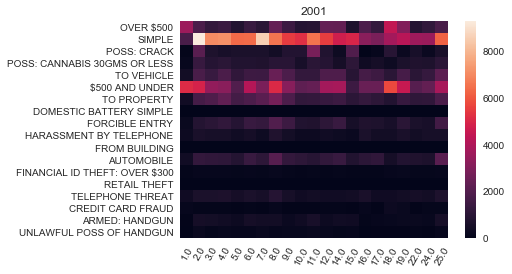

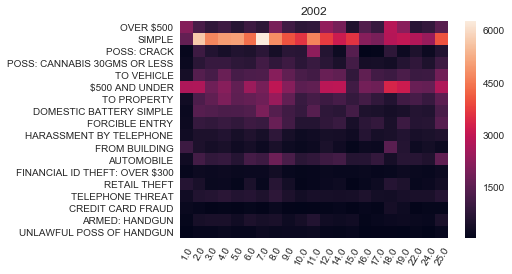

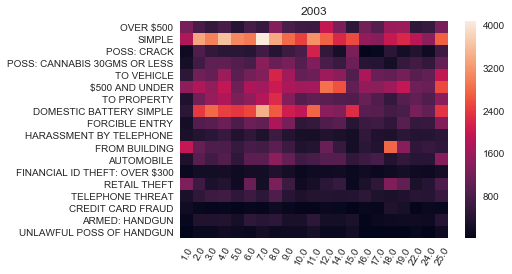

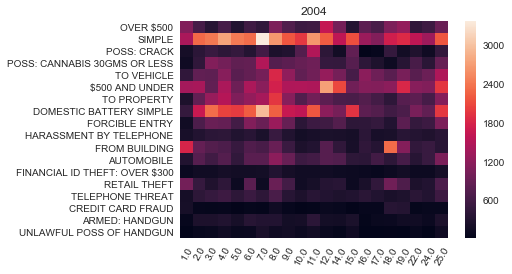

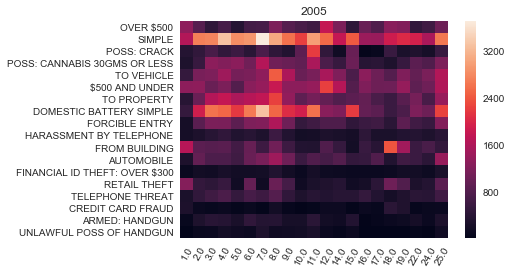

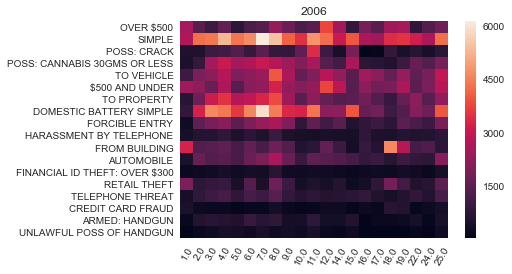

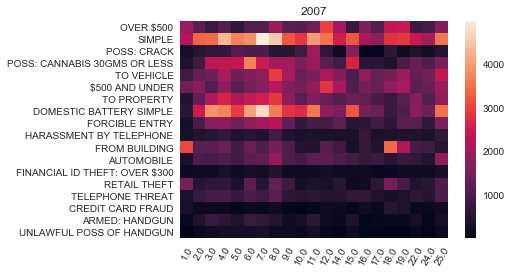

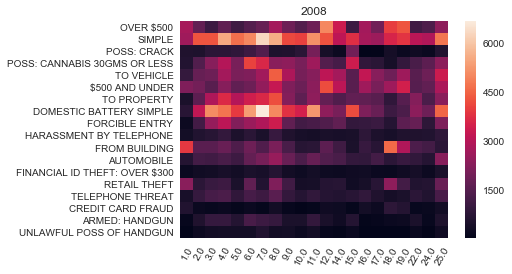

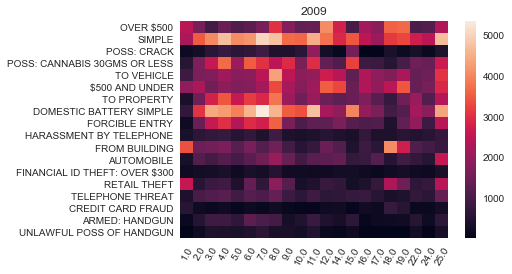

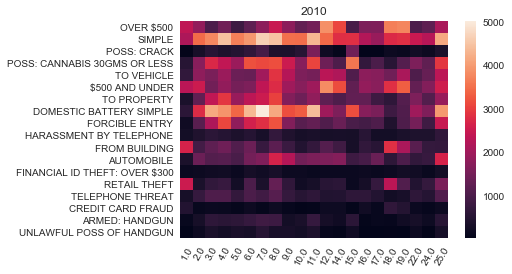

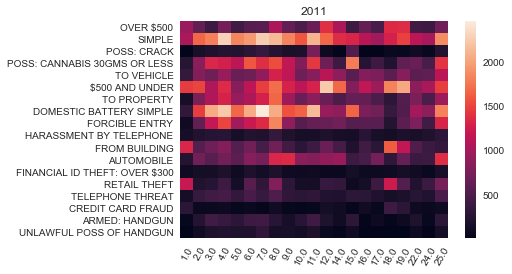

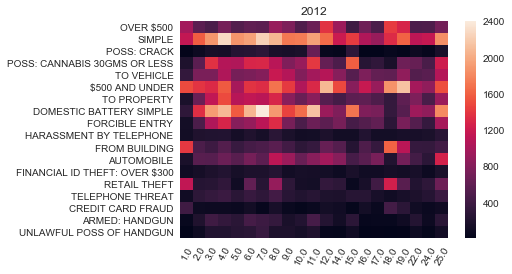

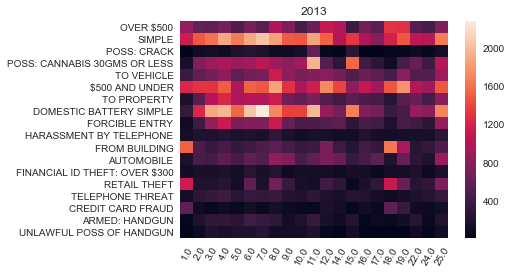

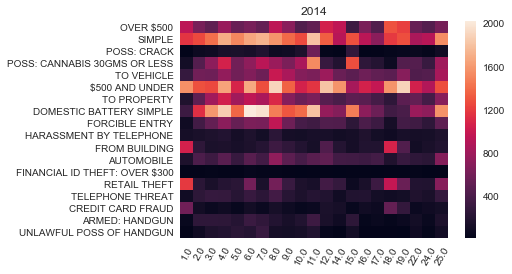

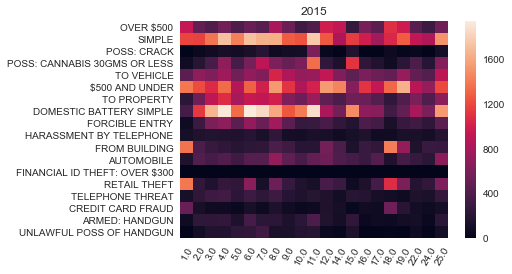

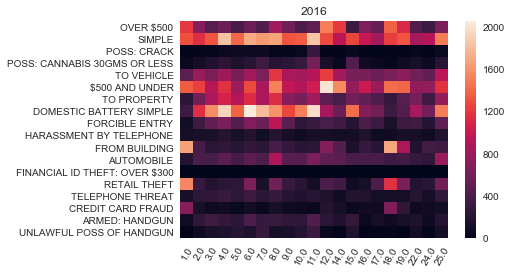

In [143]:
for year in range(2001, 2017, 1):
    freqHeatMap(districtCrimesMap[year], uniqueDistricts, uniqueCrimes)
    plt.title(year)
    plt.show(year)

In [210]:
def freqSum(freqMap):
    totalInfo =[]
    numRows = len(freqMap[2001])
    for row in range(numRows):
        cumRowInfo = [0] * len(freqMap[2001][0])
        for year in range(2001, 2017, 1):
            cumRowInfo = [sum(x) for x in zip(cumRowInfo, freqMap[year][row])]
        totalInfo.append(cumRowInfo)
    return totalInfo

In [211]:
districtCrimesTotal = freqSum(districtCrimesMap)

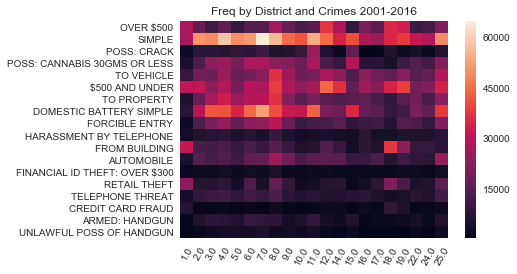

In [214]:
freqHeatMap(districtCrimesTotal, uniqueDistricts, uniqueCrimes)
plt.title('Freq by District and Crimes 2001-2016')
plt.show()

In [ ]:
districtLocsMap = freqMapMaker(uniqueDistricts,  uniqueLocations, 'District', 'Location Description', localPath, fileTypeClusters)